## Importando as Bibliotecas Necessárias

In [69]:
import pandas as pd
from matplotlib import *
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score

## Tratando o Data Set

In [57]:
#Carregando o Data Set
data = pd.read_csv("cancer.txt")

In [58]:
#Dropando as linha com '?'
Drop = []
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if(data.loc[i][j]=='?'):
            Drop.append(i)

data.drop(Drop,inplace=True)


In [59]:
#Transformando Dados Categóricos em Binários

Cat_1 = pd.get_dummies(data["Class"])
Cat_2 = pd.get_dummies(data["Irradiat"])
Cat_3 = pd.get_dummies(data["Breast"])
Cat_4 = pd.get_dummies(data["Breast-Quad"])
Cat_5 = pd.get_dummies(data["Deg_Malig"])
Cat_6 = pd.get_dummies(data["Node_Caps"])
Cat_7 = pd.get_dummies(data["Meno"])



Cat_1.drop('no-recurrence-events',axis=1,inplace=True)
data.drop('Class',axis=1,inplace=True)
data['Evento_Recorrente']=Cat_1

Cat_2.drop('no',axis=1,inplace=True)
data.drop('Irradiat',axis=1,inplace=True)
data['Irradiat']=Cat_2

Cat_3.drop('left',axis=1,inplace=True)
data.drop('Breast',axis=1,inplace=True)
data['Breast']=Cat_3 #Se a Mama for a direita, constará "1", caso contrário (Mama esquerda) 0.

data.drop('Breast-Quad',axis=1,inplace=True)
data['Quad_central']=Cat_4["central"]
data['Quad_left_low']=Cat_4["left_low"]
data['Quad_left_up']=Cat_4["left_up"]
data['Quad_right_low']=Cat_4["right_low"]
data['Quad_right_up']=Cat_4["right_up"]

data.drop('Deg_Malig',axis=1,inplace=True)
data['DegMl_1']=Cat_5[1]
data['DegMl_2']=Cat_5[2]
data['DegMl_3']=Cat_5[3]

Cat_6.drop('no',axis=1,inplace=True)
data.drop('Node_Caps',axis=1,inplace=True)
data['Node_Caps']=Cat_6

data.drop('Meno',axis=1,inplace=True)
data['ge40']=Cat_7["ge40"]
data['lt40']=Cat_7["lt40"]
data['premeno']=Cat_7["premeno"]


In [60]:
#Transformando dados Lineares em Binários
Cat_8 = pd.get_dummies(data["Age"])
Cat_9 = pd.get_dummies(data["Tumor_Size"])
Cat_10 = pd.get_dummies(data["Inv_Node"])

data.drop('Age',axis=1,inplace=True)
data['Age_20-29']=Cat_8["20-29"]
data['Age_30-39']=Cat_8["30-39"]
data['Age_40-49']=Cat_8["40-49"]
data['Age_50-59']=Cat_8["50-59"]
data['Age_60-69']=Cat_8["60-69"]
data['Age_70-79']=Cat_8["70-79"]

data.drop('Tumor_Size',axis=1,inplace=True)
data['Size_0-4']=Cat_9["0-4"]
data['Size_10-14']=Cat_9["10-14"]
data['Size_0-4']=Cat_9["0-4"]
data['Size_15-19']=Cat_9["15-19"]
data['Size_20-24']=Cat_9["20-24"]
data['Size_25-29']=Cat_9["25-29"]
data['Size_30-34']=Cat_9["30-34"]
data['Size_35-39']=Cat_9["35-39"]
data['Size_40-44']=Cat_9["40-44"]
data['Size_45-49']=Cat_9["45-49"]
data['Size_5-9']=Cat_9["5-9"]
data['Size_50-54']=Cat_9["50-54"]

data.drop('Inv_Node',axis=1,inplace=True)
data['InvNode_0-2']=Cat_10["0-2"]
data['InvNode_12-14']=Cat_10["12-14"]
data['InvNode_15-17']=Cat_10["15-17"]
data['InvNode_24-26']=Cat_10["24-26"]
data['InvNode_3-5']=Cat_10["3-5"]
data['InvNode_6-8']=Cat_10["6-8"]
data['InvNode_9-11']=Cat_10["9-11"]

In [61]:
for i in range(data.shape[1]):
        data[data.iloc[:,i].name] = data[data.iloc[:,i].name].astype('float64')

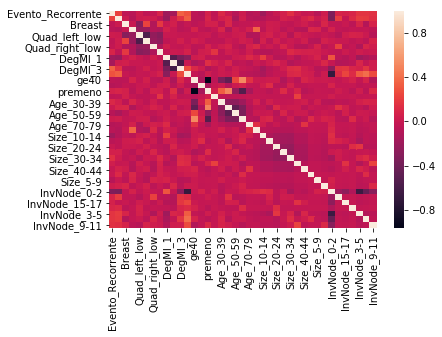

In [62]:
#Plotagem das Correlações para verificar se exitem correlações muito altas
sns.heatmap(data.corr())
#data.hist(column='Size_50-54',by='Evento_Recorrente')

In [63]:
#Avaliando as Altas Correlações
Matriz_Correc=data.corr()
Alt_Correc = set([])
for i in range(Matriz_Correc.shape[0]):
    for j in range(Matriz_Correc.shape[1]):
        if(Matriz_Correc.iloc[i,j]>=0.8 and Matriz_Correc.iloc[:,j].name!=Matriz_Correc.iloc[i,:].name):
            Alt_Correc.add(frozenset({Matriz_Correc.iloc[i,:].name,Matriz_Correc.iloc[:,j].name,Matriz_Correc.iloc[i,j]}))



In [64]:
Alt_Correc

set()

In [100]:
#data.plot.bar(x="Node_Caps",y="Irradiat")
#Separando os dados de Treino e de Teste
X_treino, X_teste, y_treino, y_teste = train_test_split(data,data["Evento_Recorrente"],test_size=0.33,random_state=8)
X_treino.drop("Evento_Recorrente",axis=1,inplace=True)
X_teste.drop("Evento_Recorrente",axis=1,inplace=True)

C:\Users\Emsnuelly\Miniconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Criando o Modelo Logístico com Validação Cruzada

In [101]:
logmodel = LogisticRegressionCV(cv=10,penalty='l2', random_state=0,multi_class='multinomial').fit(X_treino, y_treino)

C:\Users\Emsnuelly\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Emsnuelly\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Emsnuelly\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Emsnuelly\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Emsnuelly\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of

## Teste do Modelo Logistíco com Validação Cruzada

In [104]:
score = logmodel.score(X_teste, y_teste)
print("Acurácia: {}%".format(round(score,4)*100))

Acurácia: 77.17%
